# Task Details

**Company:** Accredian  
**Motto:** Fraud Detection  
**Completed By:** Venkat Biyyapu  
**Email:** venkatbiyyapu1708@gmail.com  
**Phone Number:** +91 7093457982

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from sklearn.impute import SimpleImputer
from collections import Counter
import scipy.stats as st

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# org_data = pd.read_csv('/content/drive/MyDrive/Fraud.csv')
org_data = pd.read_csv('Fraud.csv')
data=org_data.copy()

# Data Description

In [ ]:
data.shape

(6362620, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
columns_to_check = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
zero_counts = {col: (data[col] == 0).sum() for col in columns_to_check}

for col, count in zero_counts.items():
    print(f"Number of zero values in the '{col}' column: {count}")

Number of zero values in the 'amount' column: 16
Number of zero values in the 'oldbalanceOrg' column: 2102449
Number of zero values in the 'newbalanceOrig' column: 3609566
Number of zero values in the 'oldbalanceDest' column: 2704388
Number of zero values in the 'newbalanceDest' column: 2439433


In [ ]:
data[data["amount"]==0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736447,212,CASH_OUT,0.0,C1510987794,0.0,0.0,C1696624817,0.00,0.00,1,0
3247298,250,CASH_OUT,0.0,C521393327,0.0,0.0,C480398193,0.00,0.00,1,0
3760289,279,CASH_OUT,0.0,C539112012,0.0,0.0,C1106468520,538547.63,538547.63,1,0
5563714,387,CASH_OUT,0.0,C1294472700,0.0,0.0,C1325541393,7970766.57,7970766.57,1,0
5996408,425,CASH_OUT,0.0,C832555372,0.0,0.0,C1462759334,76759.90,76759.90,1,0
5996410,425,CASH_OUT,0.0,C69493310,0.0,0.0,C719711728,2921531.34,2921531.34,1,0
6168500,554,CASH_OUT,0.0,C10965156,0.0,0.0,C1493336195,230289.66,230289.66,1,0
6205440,586,CASH_OUT,0.0,C1303719003,0.0,0.0,C900608348,1328472.86,1328472.86,1,0
6266414,617,CASH_OUT,0.0,C1971175979,0.0,0.0,C1352345416,0.00,0.00,1,0
6281483,646,CASH_OUT,0.0,C2060908932,0.0,0.0,C1587892888,0.00,0.00,1,0


**Above we can observe, clearly when the type is cash_out and amount is zero the transaction was treated as fraud transaction.**

In [ ]:
filtered_data = data[(data["amount"] > 200000) & (data["type"]=="TRANSFER")]
filtered_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
82,1,TRANSFER,224606.64,C873175411,0.00,0.0,C766572210,354678.92,0.00,0,0
84,1,TRANSFER,379856.23,C1449772539,0.00,0.0,C1590550415,900180.00,19169204.93,0,0
85,1,TRANSFER,1505626.01,C926859124,0.00,0.0,C665576141,29031.00,5515763.34,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362608,742,TRANSFER,258355.42,C1226129332,258355.42,0.0,C1744173808,0.00,0.00,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0


In [ ]:
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [ ]:
data["isFraud"].value_counts()

,count
isFraud,
0,6354407
1,8213


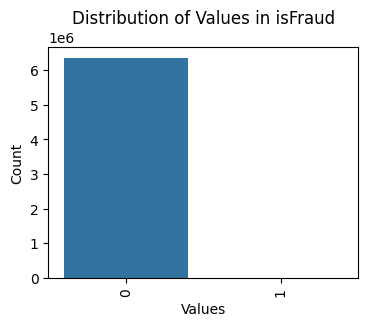

In [ ]:
plt.figure(figsize=(4, 3))
sns.countplot(data=data, x='isFraud', order=data['isFraud'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Values in isFraud')
plt.xlabel('Values')
plt.ylabel('Count')
plt.show()

# Handling Missing Values


In [ ]:
print("Count of Null Values Using isnull and isna")
data.isnull().sum()

Count of Null Values Using isnull and isna


,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
data.isna().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
duplicates= data.duplicated()
print("Count of Duplicates : ",duplicates.sum())

Count of Duplicates :  0


In [ ]:
data.nunique()

,0
step,743
type,5
amount,5316900
nameOrig,6353307
oldbalanceOrg,1845844
newbalanceOrig,2682586
nameDest,2722362
oldbalanceDest,3614697
newbalanceDest,3555499
isFraud,2


# Exploratory Data Analysis

In [ ]:
columns=data.columns
columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

## Uni-Variate Analysis

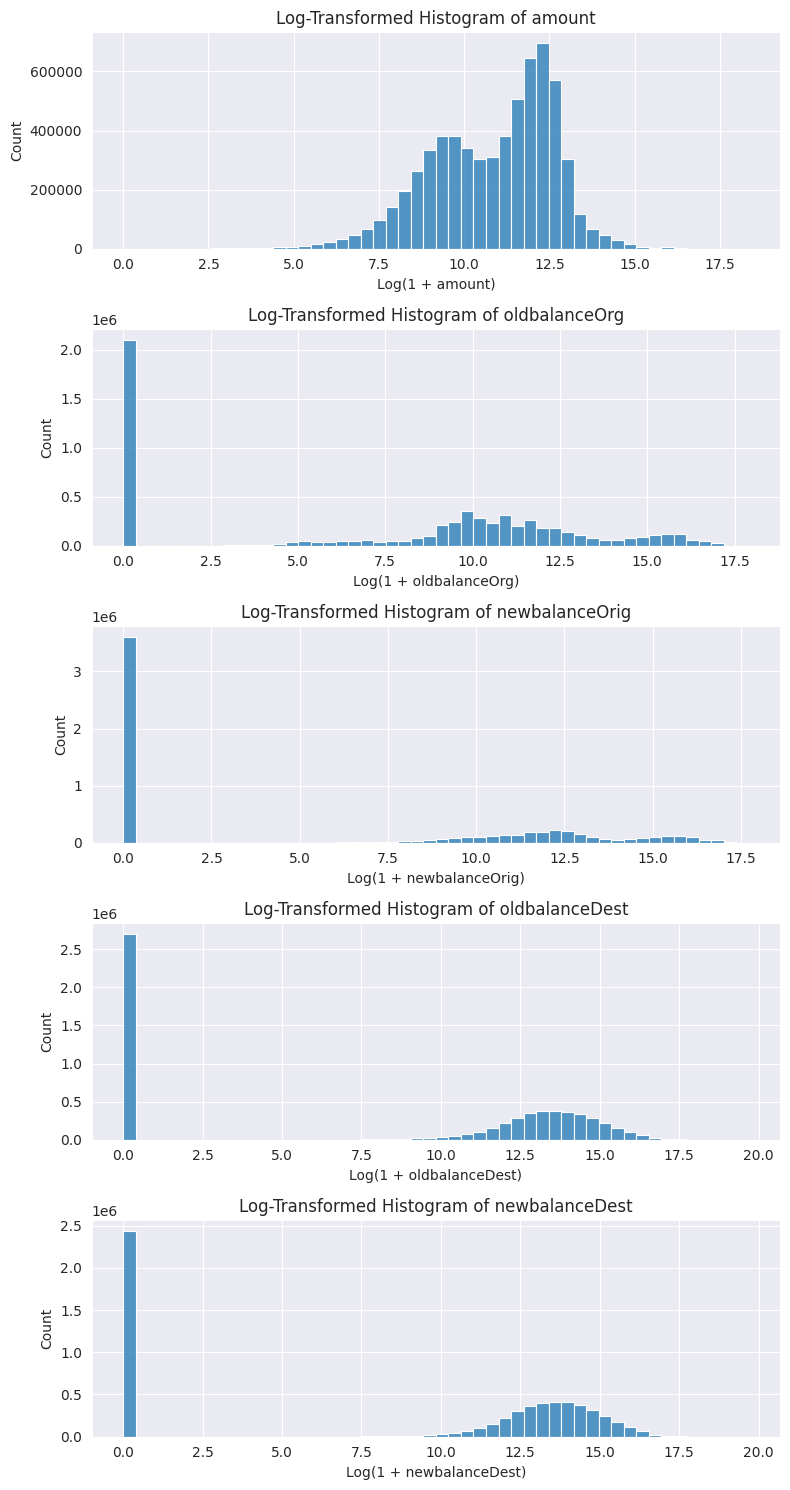

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("darkgrid")
columns_to_plot = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

plt.figure(figsize=(8, len(columns_to_plot) * 3))
for idx, col in enumerate(columns_to_plot, 1):
    plt.subplot(len(columns_to_plot), 1, idx)

    # Log-transform the values and plot histogram
    log_values = np.log1p(data[col])

    sns.histplot(log_values, bins=50, kde=False)
    plt.title(f'Log-Transformed Histogram of {col}')

    plt.xlabel(f'Log(1 + {col})')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

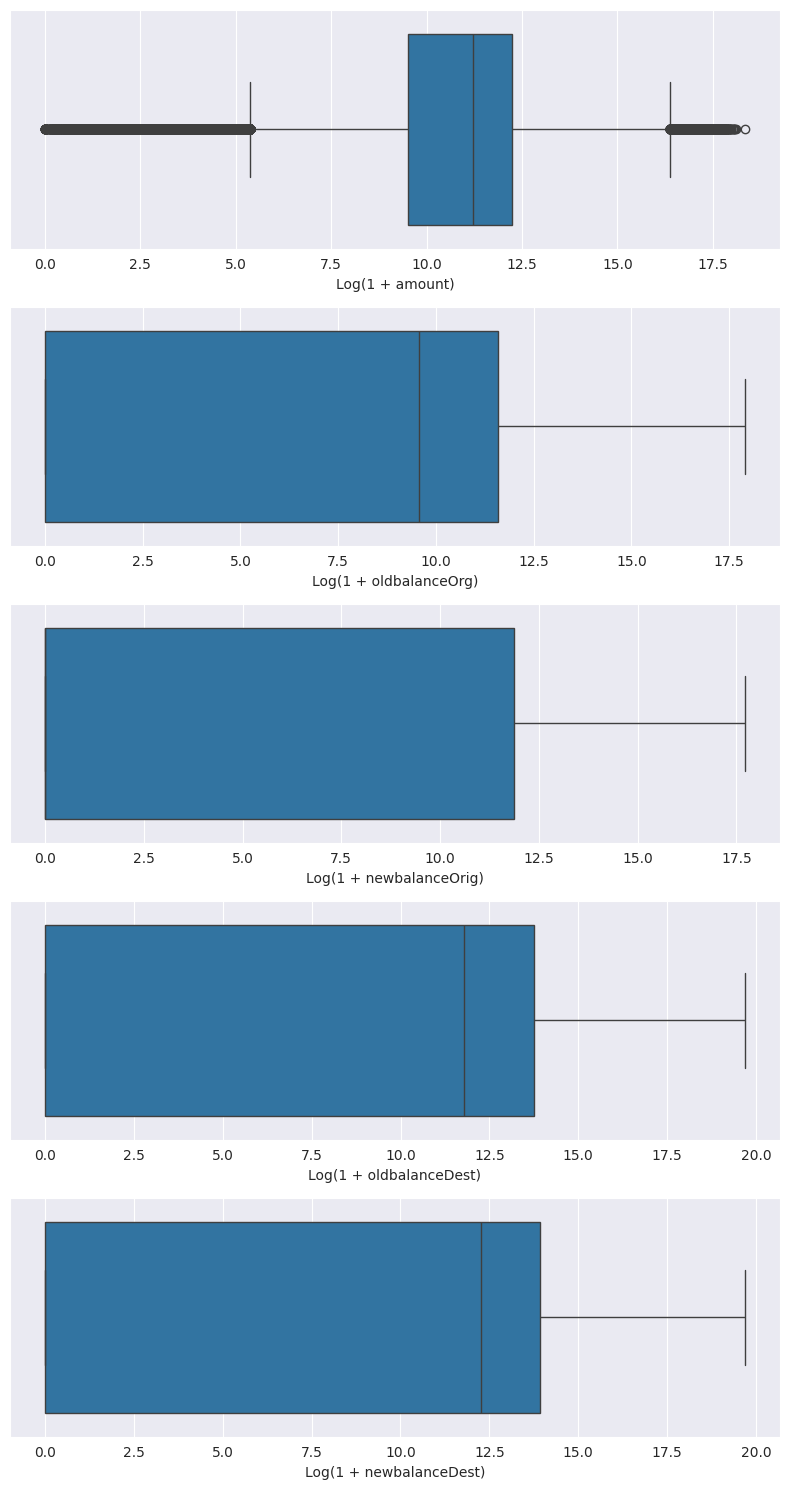

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

numerical_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

plt.figure(figsize=(8, len(numerical_columns) * 3))

for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, idx)
    sns.boxplot(x=np.log1p(data[feature]))
    plt.xlabel(f'Log(1 + {feature})')

plt.tight_layout()
plt.show()


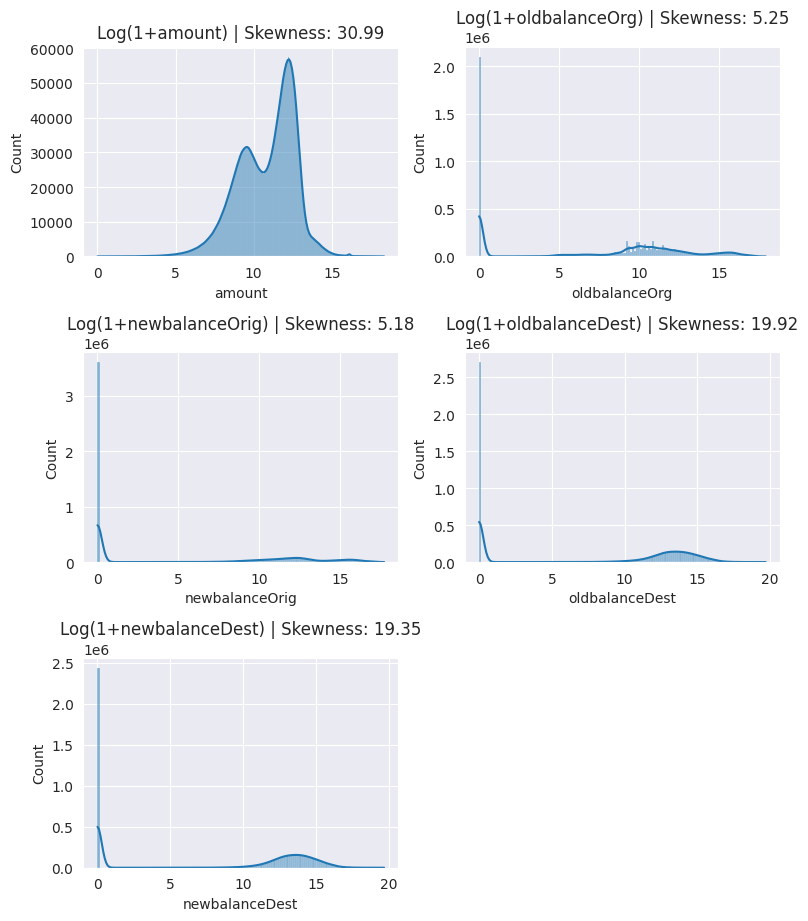

In [ ]:
sns.set_style("darkgrid")
numerical_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

plt.figure(figsize=(8, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(np.log1p(data[feature]), kde=True)
    plt.title(f"Log(1+{feature}) | Skewness: {round(data[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

### Outliers Removal or Capping

#### Outliers Removal

In [28]:
def detect_and_remove_non_fraudulent_outliers(data, column, fraud_column):
    # Calculate Q1, Q3, and IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    non_fraudulent_outliers = outliers[outliers[fraud_column] == 0]
    data_cleaned = data.drop(non_fraudulent_outliers.index)

    return data_cleaned

In [ ]:
cleaned_data = detect_and_remove_non_fraudulent_outliers(data, 'amount', 'isFraud')
print(cleaned_data.shape)
cleaned_data

(6028396, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


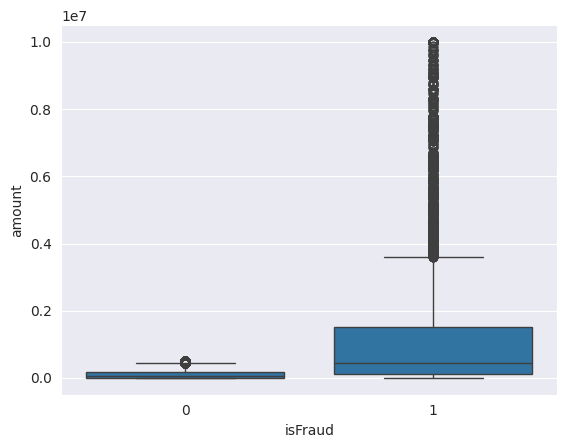

In [ ]:
sns.boxplot(x='isFraud', y='amount', data=cleaned_data)
plt.show()

#### Outliers Capping

In [29]:
def capping_outliers_iqr(data1, column):
    # Calculate Q1, Q3, and IQR for non-fraudulent data on the specified column
    Q1 = data1[data1['isFraud'] == 0][column].quantile(0.25)
    Q3 = data1[data1['isFraud'] == 0][column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the non-fraudulent transactions
    data1.loc[(data1['isFraud'] == 0) & (data1[column] < lower_bound), column] = lower_bound
    data1.loc[(data1['isFraud'] == 0) & (data1[column] > upper_bound), column] = upper_bound

    return data1

In [4]:
capped_data = capping_outliers_iqr(data, 'amount')
print(capped_data.shape)
capped_data.head(10)

(6362620, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


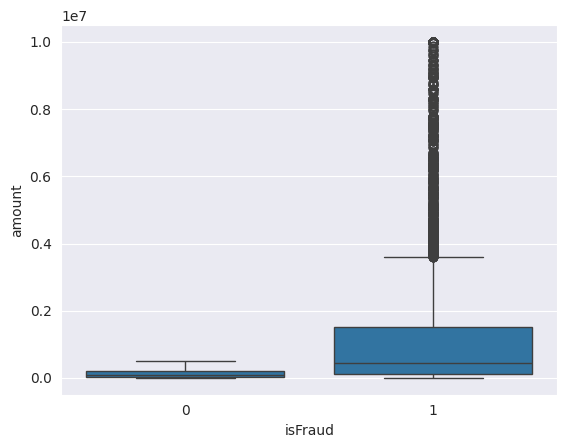

In [ ]:
sns.boxplot(x='isFraud', y='amount', data=capped_data)
plt.show()

#### Decision
***I have chosen the capping technique because it strikes a balance between preserving data integrity and mitigating the effects of extreme values. In fraud detection, outliers often represent rare but important cases, such as fraudulent transactions. Removing these outliers could lead to a loss of critical information that may influence the model's ability to identify anomalies. Capping allows us to limit the influence of these extreme values without discarding them, ensuring the model remains robust and effective. This technique maintains the dataset’s representativeness, avoids overfitting, and better handles real-world variability, leading to more accurate and reliable predictions.***

## Bi-Variate Analysis

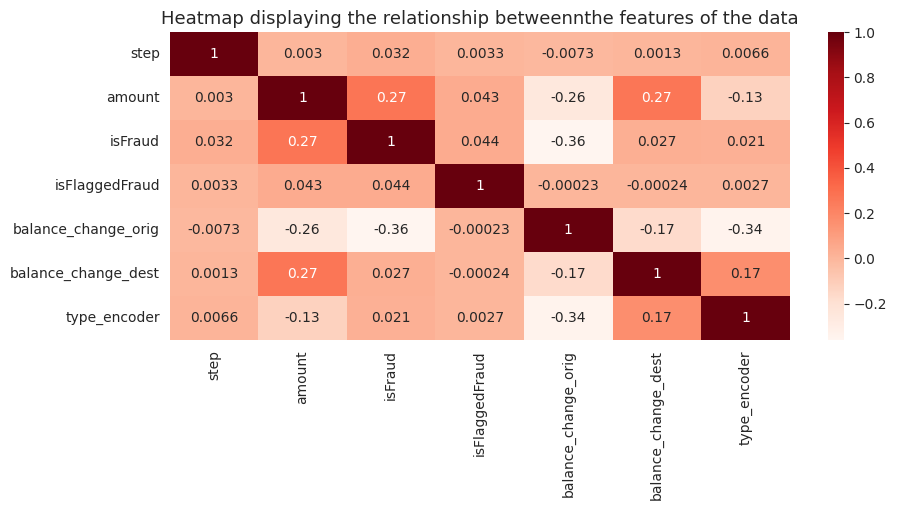

In [ ]:
plt.figure(figsize=(10,4))
numeric_columns=capped_data.select_dtypes(include=[np.number])
sns.heatmap(numeric_columns.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship betweennthe features of the data',
         fontsize=13)
plt.show()

It is evident that **oldbalanceOrg** and **oldbalanceDest** are highly correlated with **newbalanceOrg** and **newbalanceDest**, respectively. Additionally, the **amount** feature shows a strong relationship with both **oldbalanceDest** and **newbalanceDest**. These correlations could introduce multicollinearity, which may negatively impact the model's performance. Therefore, it may be beneficial to remove or address these features to enhance the model's effectiveness.

In [ ]:
numeric_columns.corr()["isFraud"]

,isFraud
step,0.031578
amount,0.272374
oldbalanceOrg,0.010154
newbalanceOrig,-0.008148
oldbalanceDest,-0.005885
newbalanceDest,0.000535
isFraud,1.000000
isFlaggedFraud,0.044109


### After removing the multi-collinearity

In [5]:
#Remove Multi-Collinearlity
capped_data['balance_change_orig'] = capped_data['newbalanceOrig'] - capped_data['oldbalanceOrg']
capped_data['balance_change_dest'] = capped_data['newbalanceDest'] - capped_data['oldbalanceDest']
capped_data = capped_data.drop(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], axis=1)
org_cappped_data = capped_data.copy()
capped_data.head()

,step,type,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,balance_change_orig,balance_change_dest
0,1,PAYMENT,9839.64,C1231006815,M1979787155,0,0,-9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,M2044282225,0,0,-1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,C553264065,1,0,-181.00,0.0
3,1,CASH_OUT,181.00,C840083671,C38997010,1,0,-181.00,-21182.0
4,1,PAYMENT,11668.14,C2048537720,M1230701703,0,0,-11668.14,0.0


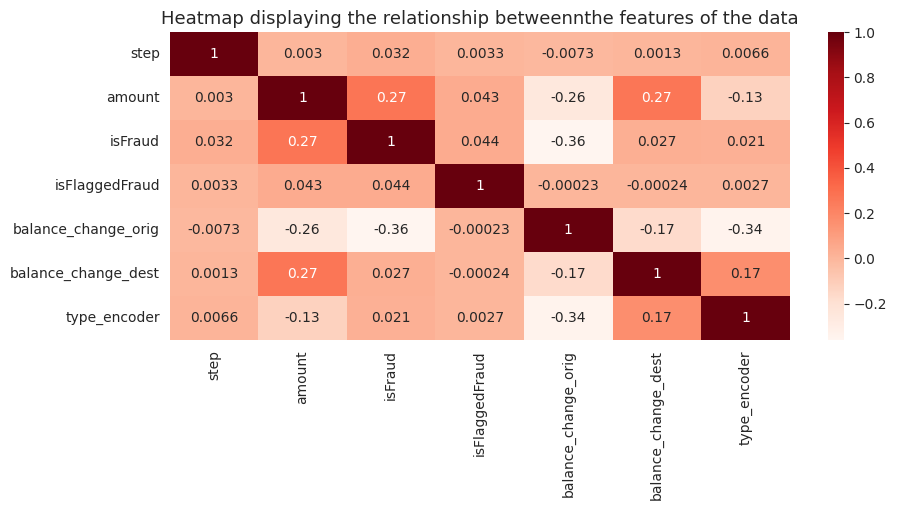

In [ ]:
plt.figure(figsize=(10,4))
numeric_columns=capped_data.select_dtypes(include=[np.number])
sns.heatmap(numeric_columns.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship betweennthe features of the data',
         fontsize=13)
plt.show()

From the above correlation matrix we can detetermine amount, balance_change_orig, balance_change_dest are the key features because they are highly related to isFraud feature.

In [ ]:
numeric_columns.corr()["isFraud"]

,isFraud
step,0.031578
amount,0.272374
isFraud,1.000000
isFlaggedFraud,0.044109
balance_change_orig,-0.362472
balance_change_dest,0.027028


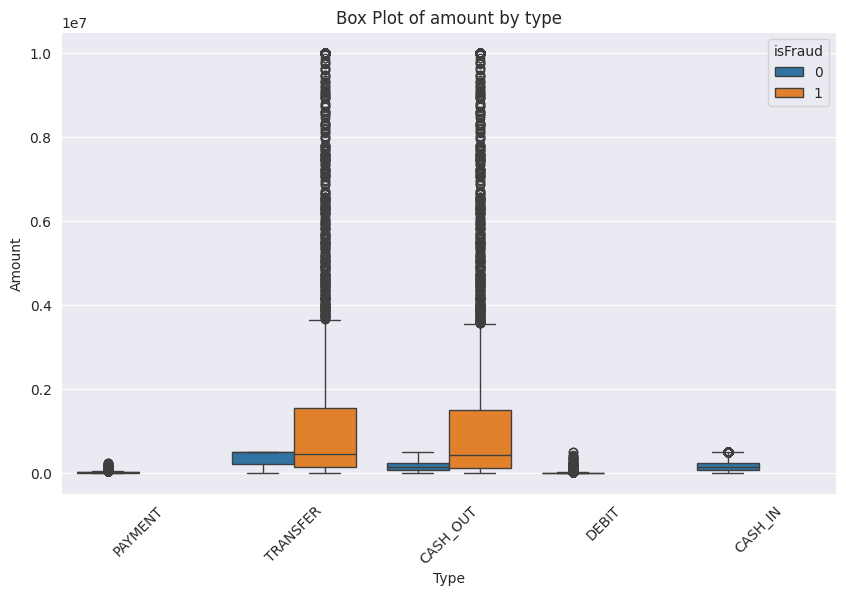

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='amount', data=capped_data, hue='isFraud')
plt.title('Box Plot of amount by type')
plt.xlabel('Type')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend(title='isFraud')
plt.show()

From above graph we can determine that most of the fraudulent transactions are observed when the type is either transfer or cash_out

# Model Prediction

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
capped_data['type_encoder'] = label_encoder.fit_transform(capped_data['type'])

In [8]:
capped_data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'nameDest', 'isFraud',
       'isFlaggedFraud', 'balance_change_orig', 'balance_change_dest',
       'type_encoder'],
      dtype='object')

## Data Splitting

In [9]:
X = capped_data.drop(['step', 'type','nameOrig', 'nameDest', 'isFraud','isFlaggedFraud'], axis=1)
y = capped_data['isFraud']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## LogisticRegression

In [ ]:
logistic_model= LogisticRegression(class_weight='balanced', random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [ ]:
y_pred = logistic_model.predict(X_test)
print(f"Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.72      0.84   1906322
           1       0.00      0.99      0.01      2464

    accuracy                           0.72   1908786
   macro avg       0.50      0.85      0.42   1908786
weighted avg       1.00      0.72      0.84   1908786



Confusion Matrix:


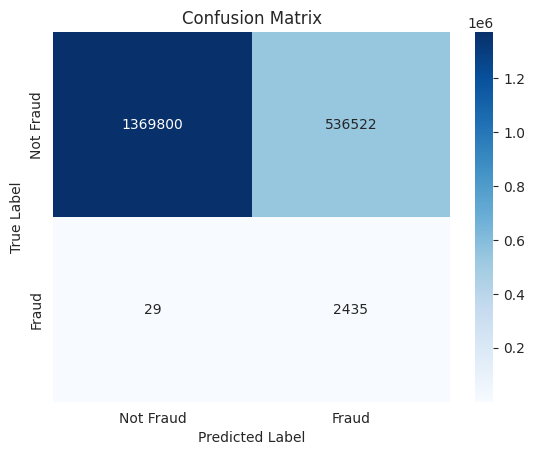

In [ ]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
roc_auc = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])
print(f'ROC-AUC Score: {roc_auc:.2f}')

ROC-AUC Score: 0.97


## Random Forest

In [ ]:
model = RandomForestClassifier(n_estimators=20,random_state=42,class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=20,
                       random_state=42)

In [ ]:
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.78      0.74      0.76      2464

    accuracy                           1.00   1908786
   macro avg       0.89      0.87      0.88   1908786
weighted avg       1.00      1.00      1.00   1908786



Confusion Matrix:


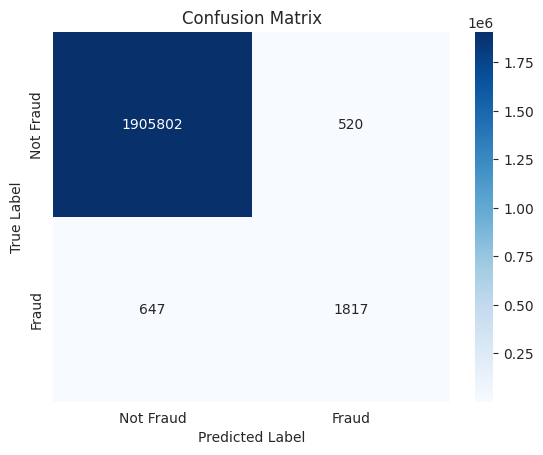

In [ ]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f'ROC-AUC Score: {roc_auc:.2f}')

ROC-AUC Score: 0.88


## Decision Trees

In [ ]:
dt_model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
y_pred = dt_model.predict(X_test)
print(f"Classification Report :")
print(classification_report(y_test, y_pred))

Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       1.00      0.54      0.70      2464

    accuracy                           1.00   1908786
   macro avg       1.00      0.77      0.85   1908786
weighted avg       1.00      1.00      1.00   1908786



Confusion Matrix:


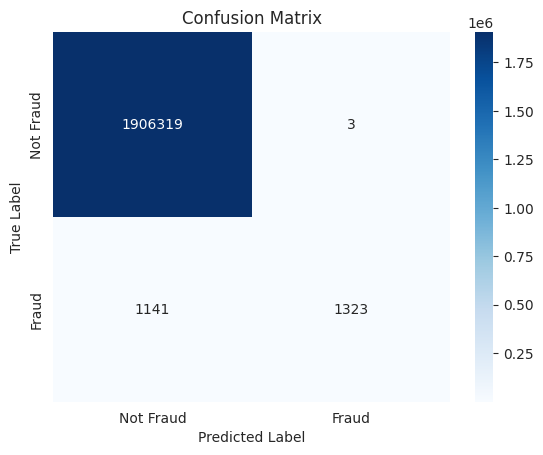

In [ ]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])
print(f'ROC-AUC Score: {roc_auc:.2f}')

ROC-AUC Score: 0.94


## Key Observations from the Models Performance

**The data is clearly imbalanced, and Decision Trees and Random Forest models have proven to be the most suitable, as they demonstrate better precision, recall, and f1-scores compared to other models. Logistic regression, in contrast, performed poorly. Notably, Decision Trees offer higher precision than Random Forests, while Random Forests provide better recall. Despite these models showing very high accuracy, achieving high precision is crucial for fraud detection, as flagging legitimate transactions as fraud can cause unnecessary issues. To further improve precision, I plan to enhance feature engineering, normalize the data, and reconsider the previously dropped columns.**

# Modal Improvement

In [10]:
org_cappped_data.head()

,step,type,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,balance_change_orig,balance_change_dest
0,1,PAYMENT,9839.64,C1231006815,M1979787155,0,0,-9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,M2044282225,0,0,-1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,C553264065,1,0,-181.00,0.0
3,1,CASH_OUT,181.00,C840083671,C38997010,1,0,-181.00,-21182.0
4,1,PAYMENT,11668.14,C2048537720,M1230701703,0,0,-11668.14,0.0


In [11]:
filtered_df = org_cappped_data[org_cappped_data['nameDest'].str.startswith('M')]

count_ones = (filtered_df['isFraud'] == 1).sum()
count_zeros = (filtered_df['isFraud'] == 0).sum()

print(f"Number of 1's in column B where column A starts with 'M': {count_ones}")
print(f"Number of 0's in column B where column A starts with 'M': {count_zeros}")

Number of 1's in column B where column A starts with 'M': 0
Number of 0's in column B where column A starts with 'M': 2151495


It was observed that transactions where `nameDest` starts with "M" do not contain any fraudulent activities. Therefore, I am now attempting to categorize all these "M" transactions under a common label to simplify analysis and modeling.

In [12]:
org_cappped_data['nameDest'] = org_cappped_data['nameDest'].apply(lambda x: 'M' if str(x).startswith('M') else x)

In [13]:
from sklearn.preprocessing import LabelEncoder

unique_values_A = org_cappped_data['nameOrig'].unique()
unique_values_B = org_cappped_data['nameDest'].unique()

unique_values = list(set(unique_values_A) | set(unique_values_B))
label_encoder = LabelEncoder()
label_encoder.fit(unique_values)

org_cappped_data['nameOrig'] = label_encoder.transform(org_cappped_data['nameOrig'])
org_cappped_data['nameDest'] = label_encoder.transform(org_cappped_data['nameDest'])

In [14]:
org_cappped_data.head(10)

,step,type,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,balance_change_orig,balance_change_dest
0,1,PAYMENT,9839.64,826047,6923499,0,0,-9839.64,0.00
1,1,PAYMENT,1864.28,2385583,6923499,0,0,-1864.28,0.00
2,1,TRANSFER,181.00,1092310,5321766,1,0,-181.00,0.00
3,1,CASH_OUT,181.00,6351404,4737220,1,0,-181.00,-21182.00
4,1,PAYMENT,11668.14,3755408,6923499,0,0,-11668.14,0.00
5,1,PAYMENT,7817.71,6567564,6923499,0,0,-7817.71,0.00
6,1,PAYMENT,7107.77,1968251,6923499,0,0,-7107.77,0.00
7,1,PAYMENT,7861.64,3268422,6923499,0,0,-7861.64,0.00
8,1,PAYMENT,4024.36,947369,6923499,0,0,-2671.00,0.00
9,1,DEBIT,5337.77,5892478,3423332,0,0,-5337.77,-1549.21


In [15]:
label_encoder_type = LabelEncoder()
org_cappped_data['type'] = label_encoder_type.fit_transform(org_cappped_data['type'])
org_cappped_data.head(10)

,step,type,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,balance_change_orig,balance_change_dest
0,1,3,9839.64,826047,6923499,0,0,-9839.64,0.00
1,1,3,1864.28,2385583,6923499,0,0,-1864.28,0.00
2,1,4,181.00,1092310,5321766,1,0,-181.00,0.00
3,1,1,181.00,6351404,4737220,1,0,-181.00,-21182.00
4,1,3,11668.14,3755408,6923499,0,0,-11668.14,0.00
5,1,3,7817.71,6567564,6923499,0,0,-7817.71,0.00
6,1,3,7107.77,1968251,6923499,0,0,-7107.77,0.00
7,1,3,7861.64,3268422,6923499,0,0,-7861.64,0.00
8,1,3,4024.36,947369,6923499,0,0,-2671.00,0.00
9,1,2,5337.77,5892478,3423332,0,0,-5337.77,-1549.21


In [16]:
org_cappped_data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'nameDest', 'isFraud',
       'isFlaggedFraud', 'balance_change_orig', 'balance_change_dest'],
      dtype='object')

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_scale = ['amount', 'nameOrig', 'nameDest','balance_change_orig', 'balance_change_dest']
org_cappped_data[columns_to_scale] = scaler.fit_transform(org_cappped_data[columns_to_scale])
org_cappped_data.head(10)

,step,type,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,balance_change_orig,balance_change_dest
0,1,3,-0.703258,-1.318844,0.992393,0,0,-0.211876,-0.152896
1,1,3,-0.748543,-0.538538,0.992393,0,0,-0.157490,-0.152896
2,1,4,-0.758101,-1.185620,0.298329,1,0,-0.146011,-0.152896
3,1,1,-0.758101,1.445740,0.045034,1,0,-0.146011,-0.178952
4,1,3,-0.692875,0.146847,0.992393,0,0,-0.224345,-0.152896
5,1,3,-0.714739,1.553895,0.992393,0,0,-0.198088,-0.152896
6,1,3,-0.718770,-0.747348,0.992393,0,0,-0.193247,-0.152896
7,1,3,-0.714489,-0.096814,0.992393,0,0,-0.198388,-0.152896
8,1,3,-0.736278,-1.258141,0.992393,0,0,-0.162991,-0.152896
9,1,2,-0.728820,1.216119,-0.524300,0,0,-0.181177,-0.154801


I have decided to normalize the variables `amount`, `nameOrig`, `nameDest`,  `balance_change_orig`, and `balance_change_dest` to improve model performance, as they contain very large values. On the other hand, variables like `Step`, `type`, `isFraud`, and `isFlaggedFraud` are not excessively large, so normalization is not necessary for these.

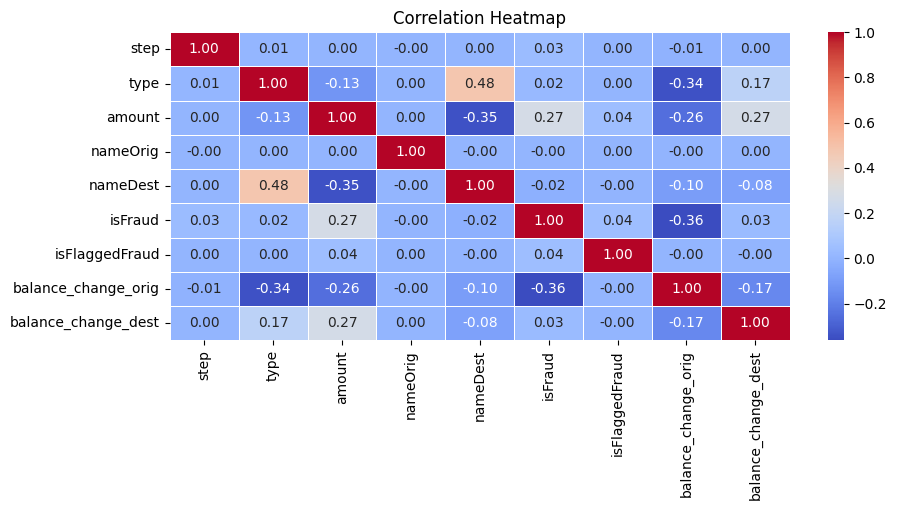

In [18]:
correlation_matrix = org_cappped_data.corr()
plt.figure(figsize=(10, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
org_cappped_data.corr()['isFraud']

step                   0.031578
type                   0.020833
amount                 0.272374
nameOrig              -0.000464
nameDest              -0.017879
isFraud                1.000000
isFlaggedFraud         0.044109
balance_change_orig   -0.362472
balance_change_dest    0.027028
Name: isFraud, dtype: float64

## Data Splitting

In [19]:
X=org_cappped_data.drop(['step','isFraud','isFlaggedFraud'], axis=1)
y=org_cappped_data['isFraud']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [20]:
X.head()

,type,amount,nameOrig,nameDest,balance_change_orig,balance_change_dest
0,3,-0.703258,-1.318844,0.992393,-0.211876,-0.152896
1,3,-0.748543,-0.538538,0.992393,-0.157490,-0.152896
2,4,-0.758101,-1.185620,0.298329,-0.146011,-0.152896
3,1,-0.758101,1.445740,0.045034,-0.146011,-0.178952
4,3,-0.692875,0.146847,0.992393,-0.224345,-0.152896


I have decided to drop the `Step` and `isFlaggedFraud` columns, as they show low correlation with the target variable `isFraud`, based on the correlation matrix analysis. Additionally, I have already addressed multicollinearity in the previous capped data by replacing `oldbalanceOrg`, `oldbalanceDest`, `newbalanceOrg`, and `newbalanceDest` with `balance_change_orig` and `balance_change_dest`, respectively.

## Fine Tuning of Random Forest

Testing model with n_estimators=20 and class_weight=balanced
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.99      0.73      0.84      2464

    accuracy                           1.00   1908786
   macro avg       1.00      0.87      0.92   1908786
weighted avg       1.00      1.00      1.00   1908786

Confusion Matrix:


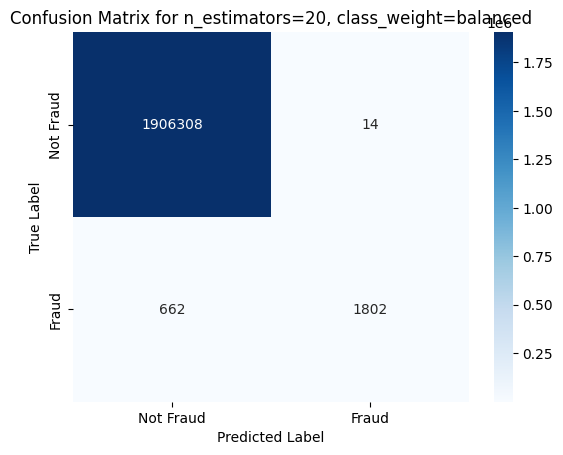

ROC-AUC Score: 0.89
Testing model with n_estimators=20 and class_weight=None
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.99      0.73      0.84      2464

    accuracy                           1.00   1908786
   macro avg       0.99      0.87      0.92   1908786
weighted avg       1.00      1.00      1.00   1908786

Confusion Matrix:


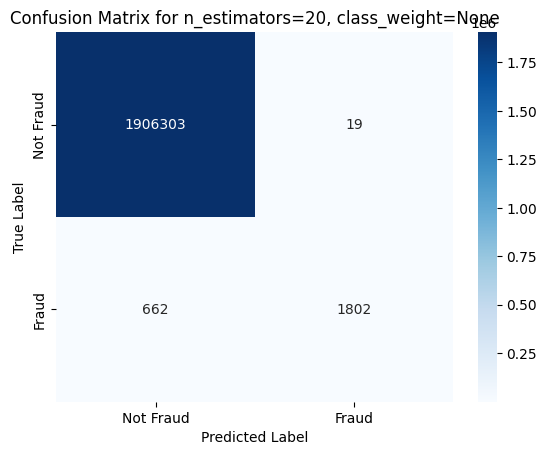

ROC-AUC Score: 0.89
Testing model with n_estimators=50 and class_weight=balanced
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.99      0.73      0.84      2464

    accuracy                           1.00   1908786
   macro avg       1.00      0.87      0.92   1908786
weighted avg       1.00      1.00      1.00   1908786

Confusion Matrix:


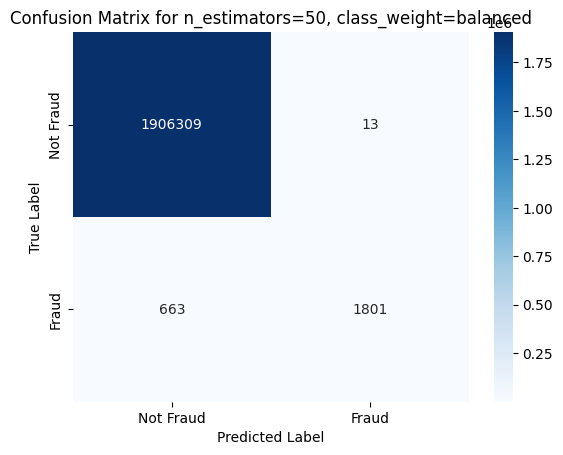

ROC-AUC Score: 0.90
Testing model with n_estimators=50 and class_weight=None
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.99      0.73      0.84      2464

    accuracy                           1.00   1908786
   macro avg       1.00      0.87      0.92   1908786
weighted avg       1.00      1.00      1.00   1908786

Confusion Matrix:


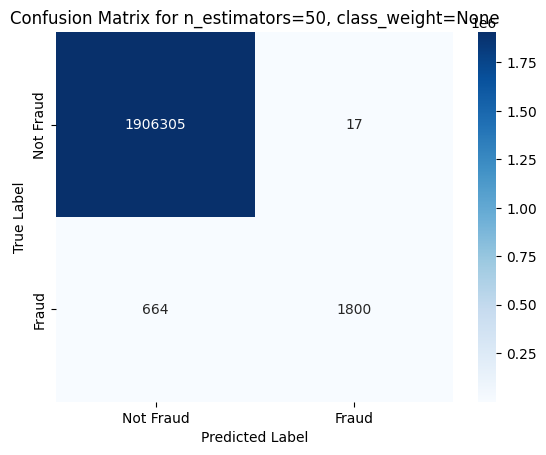

ROC-AUC Score: 0.90
Testing model with n_estimators=100 and class_weight=balanced
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.99      0.73      0.84      2464

    accuracy                           1.00   1908786
   macro avg       1.00      0.87      0.92   1908786
weighted avg       1.00      1.00      1.00   1908786

Confusion Matrix:


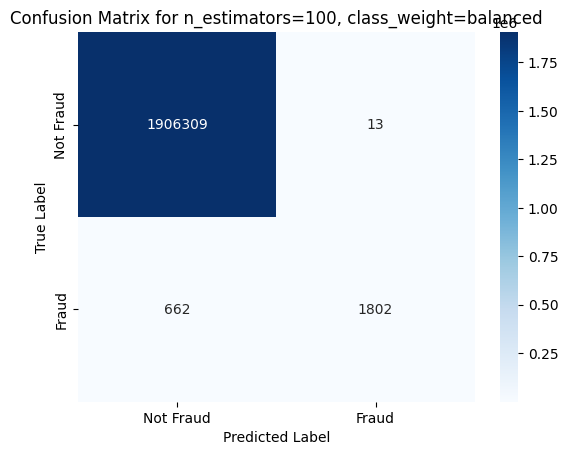

ROC-AUC Score: 0.91
Testing model with n_estimators=100 and class_weight=None
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.99      0.73      0.84      2464

    accuracy                           1.00   1908786
   macro avg       1.00      0.87      0.92   1908786
weighted avg       1.00      1.00      1.00   1908786

Confusion Matrix:


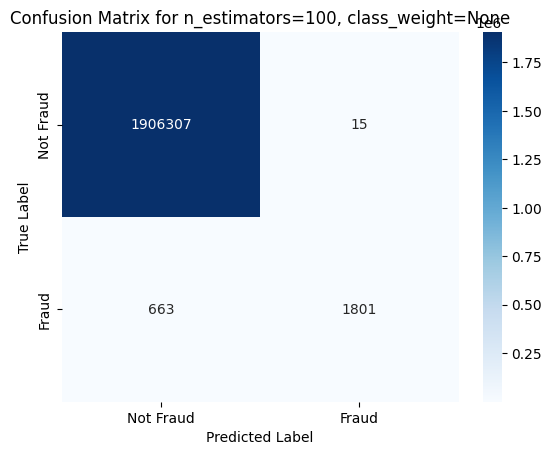

ROC-AUC Score: 0.91


In [ ]:
n_estimators_list = [20, 50, 100]
class_weight_list = ['balanced', None]

for n_estimators in n_estimators_list:
    for class_weight in class_weight_list:
        print(f"Testing model with n_estimators={n_estimators} and class_weight={class_weight}")

        rf_model = RandomForestClassifier(
            n_estimators=n_estimators,
            class_weight=class_weight,
            random_state=42
        )
        rf_model.fit(X_train, y_train)

        y_pred = rf_model.predict(X_test)

        print("Classification Report:")
        print(classification_report(y_test, y_pred))

        print("Confusion Matrix:")
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
        plt.title(f'Confusion Matrix for n_estimators={n_estimators}, class_weight={class_weight}')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

        roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
        print(f'ROC-AUC Score: {roc_auc:.2f}')



After fine-tuning the model with `n_estimators` values of 20, 50, and 100, and exploring both `class_weight` options ('balanced' and `None`), it was observed that all configurations yielded similar precision results. However, the combination of `n_estimators = 20` and `class_weight = 'balanced'` performed slightly better across precison and other metrics, making it the best performing configuration.

Thus, the best parameters identified so far are:
- `n_estimators = 20`
- `class_weight = 'balanced'`

This configuration strikes a balance between performance and computational efficiency, as increasing the number of estimators or adjusting class weights did not provide significant additional benefits.

## Best Random Forest

In [ ]:
rn_model = RandomForestClassifier(n_estimators=20,random_state=42,class_weight='balanced')
rn_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=20,
                       random_state=42)

In [ ]:
y_pred = rn_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.99      0.73      0.84      2464

    accuracy                           1.00   1908786
   macro avg       1.00      0.86      0.92   1908786
weighted avg       1.00      1.00      1.00   1908786



Confusion Matrix:


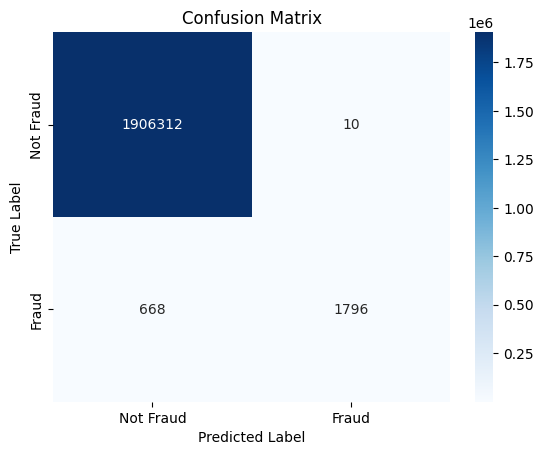

In [ ]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
roc_auc = roc_auc_score(y_test, rn_model.predict_proba(X_test)[:, 1])
print(f'ROC-AUC Score: {roc_auc:.2f}')

ROC-AUC Score: 0.89


## Fine Tuning of Decision Trees


Testing model with criterion='gini', max_depth=3
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.92      0.53      0.68      2464

    accuracy                           1.00   1908786
   macro avg       0.96      0.77      0.84   1908786
weighted avg       1.00      1.00      1.00   1908786

Confusion Matrix:


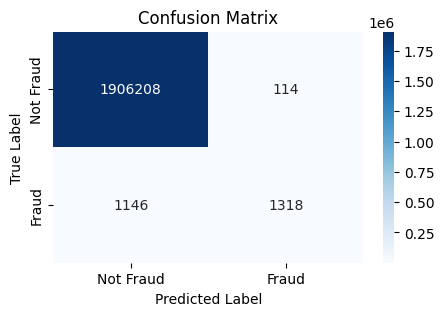

ROC-AUC Score: 0.90

Testing model with criterion='gini', max_depth=5
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.94      0.64      0.76      2464

    accuracy                           1.00   1908786
   macro avg       0.97      0.82      0.88   1908786
weighted avg       1.00      1.00      1.00   1908786

Confusion Matrix:


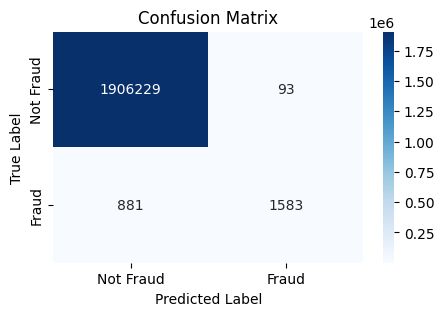

ROC-AUC Score: 0.94

Testing model with criterion='gini', max_depth=7
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.99      0.64      0.78      2464

    accuracy                           1.00   1908786
   macro avg       1.00      0.82      0.89   1908786
weighted avg       1.00      1.00      1.00   1908786

Confusion Matrix:


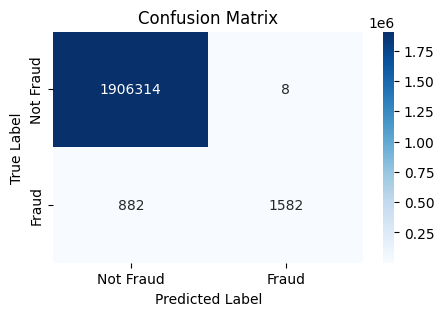

ROC-AUC Score: 0.98

Testing model with criterion='gini', max_depth=9
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.97      0.73      0.83      2464

    accuracy                           1.00   1908786
   macro avg       0.98      0.87      0.92   1908786
weighted avg       1.00      1.00      1.00   1908786

Confusion Matrix:


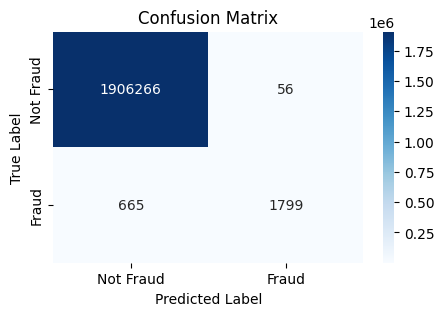

ROC-AUC Score: 0.98

Testing model with criterion='entropy', max_depth=3
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       1.00      0.46      0.63      2464

    accuracy                           1.00   1908786
   macro avg       1.00      0.73      0.81   1908786
weighted avg       1.00      1.00      1.00   1908786

Confusion Matrix:


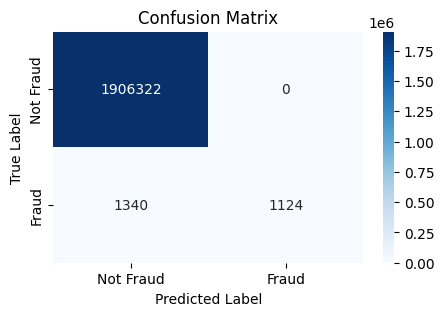

ROC-AUC Score: 0.95

Testing model with criterion='entropy', max_depth=5
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.99      0.66      0.79      2464

    accuracy                           1.00   1908786
   macro avg       1.00      0.83      0.89   1908786
weighted avg       1.00      1.00      1.00   1908786

Confusion Matrix:


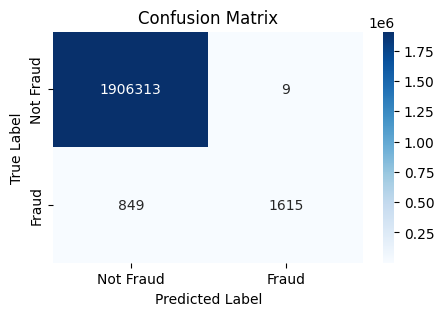

ROC-AUC Score: 0.99

Testing model with criterion='entropy', max_depth=7
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.95      0.73      0.82      2464

    accuracy                           1.00   1908786
   macro avg       0.98      0.86      0.91   1908786
weighted avg       1.00      1.00      1.00   1908786

Confusion Matrix:


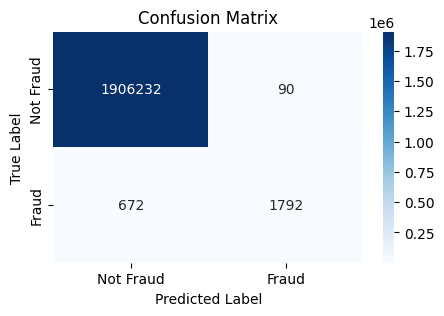

ROC-AUC Score: 0.99

Testing model with criterion='entropy', max_depth=9
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.99      0.73      0.84      2464

    accuracy                           1.00   1908786
   macro avg       0.99      0.86      0.92   1908786
weighted avg       1.00      1.00      1.00   1908786

Confusion Matrix:


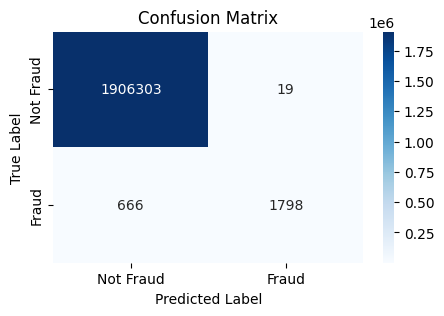

ROC-AUC Score: 0.99


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

max_depth_values = [3, 5, 7, 9]
criteria = ['gini', 'entropy']

for criterion in criteria:
    for max_depth in max_depth_values:
        print(f"\nTesting model with criterion='{criterion}', max_depth={max_depth}")

        dt_model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, random_state=42)

        dt_model.fit(X_train, y_train)
        y_pred = dt_model.predict(X_test)

        print("Classification Report:")
        print(classification_report(y_test, y_pred))

        print("Confusion Matrix:")
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(5, 3))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

        roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])
        print(f"ROC-AUC Score: {roc_auc:.2f}")

Based on the results, the `DecisionTreeClassifier` was fine-tuned using different combinations of `max_depth` and `criterion`. Here is a summary of observations from the performance metrics:

- **Max Depth**: Increasing the `max_depth` generally improves the model’s performance, particularly for precision and recall. At shallower depths (e.g., 3), the recall is lower, especially for fraud detection (class 1). As the depth increases (e.g., 5, 7, 9), both precision and recall improve.
  
- **Criterion**: Both the `gini` and `entropy` criteria perform similarly, with small differences in ROC-AUC scores. However, `entropy` tends to yield slightly better ROC-AUC values in some configurations, particularly with deeper trees.

- **Best Parameters**: 
    - The best results (based on ROC-AUC) are obtained with `criterion='entropy'` and `max_depth=9`. This setup produces high precision, recall, and a strong ROC-AUC score, making it a favorable configuration for detecting fraud.
    - Another strong setup is `criterion='gini'` with `max_depth=7`, which also yields high precision and recall.

**Recommendation**:
Based on the fine-tuning results, I had decided to use `max_depth=9` with `criterion='entropy'`, as it balances precision, recall, and ROC-AUC, making it ideal for fraud detection, where catching fraudulent transactions is critical without excessively flagging legitimate transactions.

## Best Decision Tree

In [23]:
dt_model=DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=42)

In [24]:
y_pred = dt_model.predict(X_test)
print(f"Classification Report :")
print(classification_report(y_test, y_pred))

Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.99      0.73      0.84      2464

    accuracy                           1.00   1908786
   macro avg       0.99      0.86      0.92   1908786
weighted avg       1.00      1.00      1.00   1908786



Confusion Matrix:


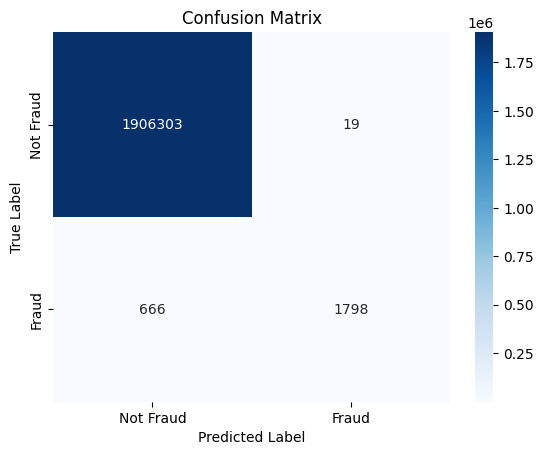

In [25]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [26]:
roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])
print(f'ROC-AUC Score: {roc_auc:.2f}')

ROC-AUC Score: 0.99


# Observations

1. No null values or duplicates in the dataset.
2. Transactions with `type` as `cash_out` and `amount` zero were flagged as fraud.
3. Capping outliers improved model performance over removal.
4. High correlations between `oldbalanceOrg`/`newbalanceOrg` and `oldbalanceDest`/`newbalanceDest`, and the `amount` feature could introduce multicollinearity. Addressing these features enhanced model performance.
5. The dataset is higly **imbalanced**. Decision Trees and Random Forests performed best with higher precision and recall, compared to Logistic Regression. High precision is crucial for fraud detection.
6. Transactions where `nameDest` starts with "M" are not fraudulent.
7. Feautre Engineering,Exploratory Data Analysis,  Normalization and Fine Tuning significantly improved the models for more accurate fraud detections.
8. Transactions categorized as `cash_out` and `transfer` exhibited higher rates of fraud compared to other transaction types.

# Challenges
1. **Data Visualization:** Values ranging from 0 to \(10^8\) made meaningful visualization challenging; resolved using log transformation.
2. **Model Fine-Tuning:** Extensive computation issues due to limited RAM made fine-tuning models difficult.
3. **Parameter Search:** Limited hardware restricted the use of extensive grid or randomized searches; opted for fewer parameters and values, which still produced good results.
4. **For Loop Fine-Tuning:** Although not optimized, fine-tuning using for loops was less time-consuming.
5. **Model Evaluation:** Running models multiple times to assess performance and identify influencing factors.
6. **Feature Engineering:** Determining which features to drop and why was challenging, as iterative testing with various models was time-consuming.

# Conclusion
In this fraud detection project, **careful preprocessing** and **feature engineering** were pivotal to improving model performance. **Capping outliers** rather than removing them preserved critical information, and replacing multicollinear features with balance change metrics enhanced model robustness.

**Complex models** like XGBoost and Bagging, provide high accuracy, may fell short in **precision** and **recall**, which are crucial for effective fraud detection. In contrast, **simpler models** like Decision Trees and Random Forests offered a more balanced trade-off between precision, recall, and F1-scores. This highlights that, in fraud detection, achieving high precision and recall is more valuable than simply aiming for high accuracy, as **minimizing false positives** and accurately identifying fraudulent transactions is essential.

**Feature engineering** and **normalization** were also significant contributors to improved model performance. Challenges such as handling large values and limited computational resources were addressed through log transformations and selective parameter tuning, although these tasks were time-consuming. Overall, the project demonstrates that **simpler models** can often outperform complex ones in specific tasks like fraud detection, where precision and recall are critical.

# Questions and Answers

### 1. Data Cleaning Including Missing Values, Outliers, and Multi-Collinearity

**Answer:**
- **Missing Values:** There were no missing values or duplicates in the dataset. However, transactions where the `nameDest` starts with "M" were identified as lacking sufficient data. These transactions were categorized under a common label to simplify analysis.
- **Outliers:** Used capping (winsorization) to limit the influence of extreme values while retaining critical information.
- **Multi-Collinearity:** Handled by replacing highly correlated features with derived metrics such as `balance_change_orig` and `balance_change_dest`, which reduced redundancy and improved model robustness.

### 2. Describe Your Fraud Detection Model in Elaboration

**Answer:** 

The fraud detection model utilized **Random Forest** and **Decision Tree** classifiers, chosen for their effective feature engineering and finetuning to maintain a proper balance between precision and recall with utmost accuracy. 

- **Random Forest:** This ensemble approach improves performance and generalization by combining multiple decision trees to make predictions. It was preferred for its robustness and ability to handle large datasets. Key parameters fine-tuned include:
  - `n_estimators`: The number of trees in the forest.
  - `class_weight`: Used to address class imbalance (e.g., 'balanced', 'None').

- **Decision Tree:** Chosen for its high precision in detecting fraud. It provides a clear, interpretable model. Key parameters fine-tuned include:
  - `max_depth`: The maximum depth of the tree, controlling the model’s complexity.
  - `criterion`: The function to measure the quality of a split (e.g., 'gini', 'entropy').

Both models were evaluated using metrics such as precision, recall, F1-score, and ROC-AUC. Detailed analysis was performed through classification reports and confusion matrices to ensure comprehensive performance assessment.


## 3. How Did You Select Variables to Be Included in the Model?

**Answer:**

Variables were selected through a rigorous bi-variate analysis process:

- **Correlation Studies:** Conducted to identify relationships between features and the target variable. This analysis helped in understanding which features had strong correlations with fraud detection, aiding in the selection of relevant variables.
  
- **Box Plots:** Used to visualize and assess the impact of multiple features on fraud detection. This approach allowed for the identification of significant features by comparing the distribution of feature values across different classes (fraudulent vs. non-fraudulent transactions). It also helped in addressing multicollinearity by highlighting redundant features and ensuring that only the most impactful features were included in the model.

## 4. Demonstrate the Performance of the Model by Using the Best Set of Tools

**Answer:**

The performance of the model was demonstrated using:

- **Classification Reports:** Provided detailed metrics including precision, recall, F1-score, and support for each class.
- **Confusion Matrices:** Illustrated the number of true positives, true negatives, false positives, and false negatives.
- **ROC-AUC Scores:** Evaluated the model's ability to distinguish between classes.

These tools collectively provided a comprehensive view of model performance, highlighting its effectiveness in fraud detection.


## 5. What Are the Key Factors That Predict Fraudulent Transactions?

**Answer:**

Key factors predicting fraudulent transactions included:

- **Transaction Amount:** High-value transactions often indicated fraud.
- **Transaction Type:** Types such as `cash_out` and `transfer` were associated with higher fraud rates.
- **Balance Changes:** Significant changes in `oldbalance` and `newbalance` were strong indicators of fraudulent activity.
- **Transaction History:** Patterns in transaction history, including frequency and recent activity, were crucial in identifying potential fraud.
- **Source Security:** Whether the source of the transaction is secured or not significantly affects fraud detection. Transactions from less secure sources are more likely to be flagged as fraudulent.

## 6. Do These Factors Make Sense? If Yes, How? If Not, How Not?
**Answer:**

Yes, these factors make sense because:
- **Transaction Amount:** Larger transactions are more likely to be scrutinized and thus more frequently flagged as fraudulent.
- **Transaction Type:** Certain types of transactions, like `cash_out` and `transfer`, are more commonly associated with fraudulent activities due to their nature.
- **Balance Changes:** Significant changes in balances can be indicative of suspicious behavior or manipulation.
- **Transaction History:** Frequent or unusual activity can suggest fraudulent behavior, making transaction history a valuable predictor.
- **Source Security:** Transactions from unsecured or less secure sources are more prone to fraudulent activities, making the security of the transaction source an important factor in fraud detection.

## 7. What Kind of Prevention Should Be Adopted While the Company Updates Its Infrastructure?

**Answer:**

To prevent fraud and ensure secure operations while updating infrastructure, consider the following best practices:

- **Use Verified Apps:** Ensure that only verified and trusted applications are used for transactions and sensitive activities.
- **Browse Secured Websites:** Access sensitive information and conduct transactions only on secured websites with HTTPS encryption.
- **Enhance Data Security:** Implement robust encryption and access controls to safeguard sensitive information.
- **Regularly Update Models:** Continuously retrain fraud detection models with new data to adapt to evolving fraud patterns.
- **Monitor Transaction Types:** Pay special attention to high-risk transaction types, such as `cash_out` and `transfer`, and monitor large transaction amounts for suspicious activities.

## 8. Assuming These Actions Have Been Implemented, How Would You Determine if They Work?
**Answer:**

To determine if these preventive measures are effective, you should:

- **Monitor Transaction Logs:** Regularly review transaction logs for any unusual or unauthorized activities.
- **Conduct Security Audits:** Perform periodic security audits to assess the effectiveness of the implemented measures.
- **Analyze Fraud Detection Metrics:** Track key metrics related to fraud detection, such as the rate of flagged transactions and false positives.
- **Solicit User Feedback:** Gather feedback from users about their experiences and any potential security issues they encounter.
- **Evaluate Incident Response:** Assess the effectiveness of the incident response protocols in addressing and mitigating security breaches.

